In [132]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [4]:
# Load data
#(x_train, y_train), (x_test, y_test) = mnist.load_data()
#x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize data

data = pd.read_csv('TMNIST_data.csv')
print(data)


                                  names  labels  1  2  3  4  5  6  7  8  ...  \
0                    GrandHotel-Regular       2  0  0  0  0  0  0  0  0  ...   
1            EncodeSansCondensed-Medium       8  0  0  0  0  0  0  0  0  ...   
2                        Varela-Regular       4  0  0  0  0  0  0  0  0  ...   
3                        ArefRuqaa-Bold       3  0  0  0  0  0  0  0  0  ...   
4                     KulimPark-Regular       1  0  0  0  0  0  0  0  0  ...   
...                                 ...     ... .. .. .. .. .. .. .. ..  ...   
29895                     Raleway[wght]       7  0  0  0  0  0  0  0  0  ...   
29896                     Charm-Regular       5  0  0  0  0  0  0  0  0  ...   
29897  BigShouldersStencilDisplay-Black       0  0  0  0  0  0  0  0  0  ...   
29898                  Gabriela-Regular       1  0  0  0  0  0  0  0  0  ...   
29899                       Ovo-Regular       6  0  0  0  0  0  0  0  0  ...   

       775  776  777  778  779  780  78

number of unique fonts = 2990


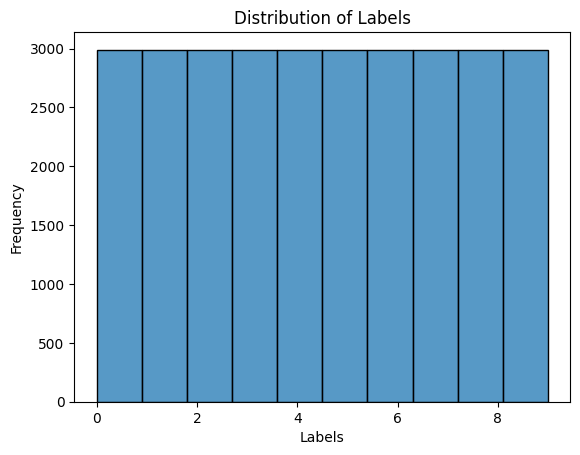

In [5]:
print("number of unique fonts =",data['names'].nunique())

sns.histplot(data['labels'], bins=10, kde=False)  # kde=False if you do not want the density estimate curve
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.show()

With this we can see how the data is distributed.
We have 2990 fonts which make up 29900 different samples.
We can also see that we have 10 samples for each font meaning the numbers 0-9.
this means that the network we train will only see each type of number 1 time.

We should now seperate our data into training, test, and validation sets.
I will be using the 70,15,15 split.

- Training = 29,900 * 0.7 = 20,930
- Test = 29,900 * 0.15 = 4,485
- Validation = 29,900 * 0.15 = 4,485

We will need to be careful how we seperate this data, if we aren't careful we could end up inadvertantly removing a greater number of examples of a given number than we intend. for example, in the entire training set there are only 2990 examples of the number 0. if we seperate ~9000 examples for our test and validation sets, its possible that we could accidentaly take most of or all the 0 examples, meaning that we will get very poor performance since we would be testing the network on things it has never seen.

For this project I am going to seperate values out by font, this way we can test to see if our algorithm understands what the specific numbers look like and can generalizes well to fonts it's never seen. 

In [6]:
#lets sort our data by font names and double check tha we have 10 values for each font
data = data.sort_values(by='names')
print(data[:25])

                 names  labels  1  2  3  4  5  6  7  8  ...  775  776  777  \
6519    ABeeZee-Italic       3  0  0  0  0  0  0  0  0  ...    0    0    0   
16848   ABeeZee-Italic       2  0  0  0  0  0  0  0  0  ...    0    0    0   
20132   ABeeZee-Italic       1  0  0  0  0  0  0  0  0  ...    0    0    0   
10904   ABeeZee-Italic       4  0  0  0  0  0  0  0  0  ...    0    0    0   
2750    ABeeZee-Italic       8  0  0  0  0  0  0  0  0  ...    0    0    0   
10538   ABeeZee-Italic       7  0  0  0  0  0  0  0  0  ...    0    0    0   
13586   ABeeZee-Italic       0  0  0  0  0  0  0  0  0  ...    0    0    0   
15902   ABeeZee-Italic       6  0  0  0  0  0  0  0  0  ...    0    0    0   
22972   ABeeZee-Italic       5  0  0  0  0  0  0  0  0  ...    0    0    0   
29626   ABeeZee-Italic       9  0  0  0  0  0  0  0  0  ...    0    0    0   
25244  ABeeZee-Regular       8  0  0  0  0  0  0  0  0  ...    0    0    0   
20451  ABeeZee-Regular       7  0  0  0  0  0  0  0  0  ...    0

The data looks just like we expected it to. Now we can go ahead and pull out the number of fonts that we want for the test and validation sets.

- Test: 4,485/10 = 448.5
- Validation: 4,485/10 = 448.5

Since each font has 10 values we will round each set up to 450 fonts, we will do this just to keep the number of examples for each number the same.

In [13]:
#Lets pull our data into its training, test and validation sets
test_data = data.iloc[:4500]
validation_data = data.iloc[4500:9000]
training_data = data.iloc[9000:]

#now lets seperate the labels from the data. 
#first we will pull out our data because we don't need to modify it other than converting to a numpy array.
test_data_x = test_data.iloc[:,2:].to_numpy()
validation_data_x = validation_data.iloc[:,2:].to_numpy()
training_data_x = training_data.iloc[:,2:].to_numpy()

#now we will also extract the labels.
test_data_y = test_data.iloc[:,1].to_numpy()
validation_data_y = validation_data.iloc[:,1].to_numpy()
training_data_y = training_data.iloc[:,1].to_numpy()


Now that we have our data figured out, lets build our network.
We can set the network size here to see how that effects the model learning.
We will start with a basic network with 2 hidden layers of 64 neurons.

In [124]:
# Define model
model = Sequential([
    Input(shape=(784,),name = 'input'),
    Dense(64, activation='tanh',name = 'dense_1'),
    Dense(32, activation='tanh', name = 'desne_2'),
    Dense(10, activation='softmax', name = 'softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(training_data_x, training_data_y, epochs=20, validation_data=(test_data_x,test_data_y))

Epoch 1/20
654/654 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7417 - loss: 0.9492 - val_accuracy: 0.8960 - val_loss: 0.4083
Epoch 2/20
654/654 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9032 - loss: 0.3480 - val_accuracy: 0.8558 - val_loss: 0.4731
Epoch 3/20
654/654 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9059 - loss: 0.3335 - val_accuracy: 0.8951 - val_loss: 0.3832
Epoch 4/20
654/654 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9197 - loss: 0.2849 - val_accuracy: 0.8973 - val_loss: 0.3438
Epoch 5/20
654/654 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9180 - loss: 0.2927 - val_accuracy: 0.9209 - val_loss: 0.2997
Epoch 6/20
654/654 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9210 - loss: 0.2706 - val_accuracy: 0.9222 - val_loss: 0.3060
Epoch 7/20
654/654 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9207 - loss: 0.2739 - val_accuracy: 0.9009 - val_loss: 0.3435
Epoch 8/20
654/654 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9162 - loss: 0.2904 - val_accuracy: 0.

In [99]:
print(test_data_x.shape)

(4500, 784)


Now lets run this code to make sure that our model is working correctly.

In [100]:
#show a random image with the lable and prediction in the title along with the cirtanty of the prediction 
def show_image():
    index = np.array(np.random.randint(0, test_data_x.shape[0]))
    image = test_data_x[index]
    label = test_data_y[index]
    print(label)
    prediction_data = model.predict(np.array([image]))
    prediction = prediction_data.argmax()
    certainty = prediction_data.max()
    plt.title(f"Label: {label}, Prediction: {prediction}, Certainty: {certainty}")
    plt.imshow(image.reshape(28,28), cmap='gray')
    plt.show()

8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


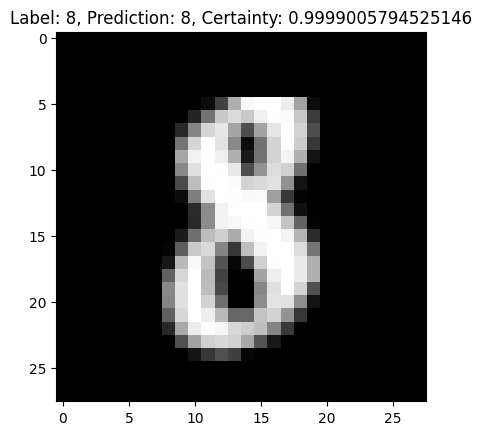

In [101]:
show_image()

Everything looks good, now lets figure out a way to visualize what it has learned.

What i will try today is to use the weights and biases of each neuron to calulate a weight map and show an image of what input activations the network is paying atterntion to for each activation. 

We can take advantage of the nature of the ouput layer to try and reverse the function. 
for example if we take the number 7, we can look at the neuron on the final layer and use the weight values to give each neuron on the previous layer an importance value. then we can repeat the process with every neuron and layer of the network to eventually get back to the original input values. if we normalize and then take the average we should get an importance map for that given number.



In [102]:
weights = model.get_weights()
for layer_weights in weights:
    print(layer_weights.shape)

(784, 64)
(64,)
(64, 32)
(32,)
(32, 10)
(10,)


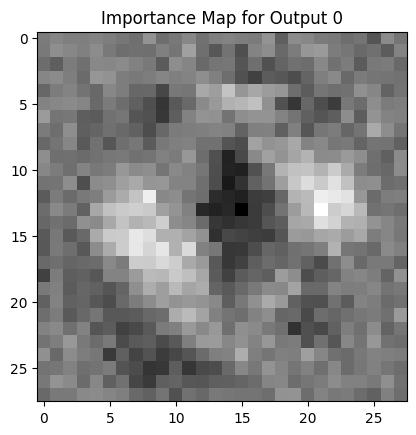

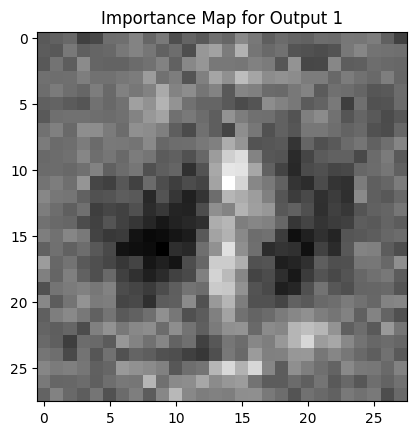

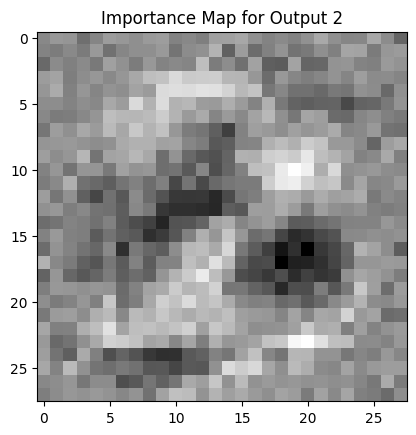

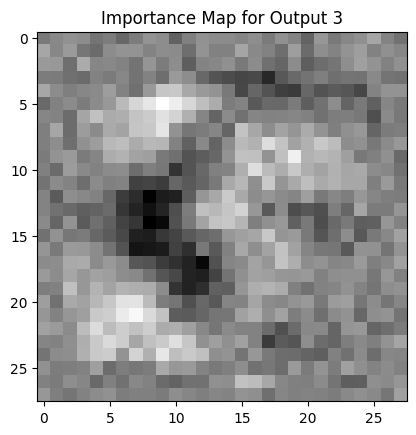

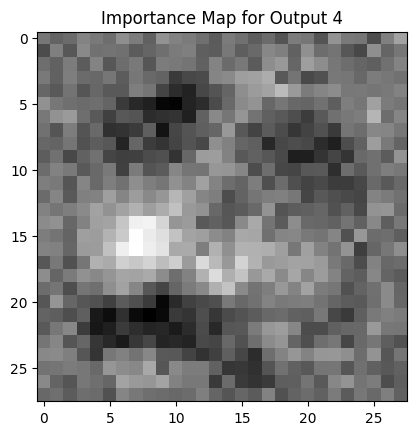

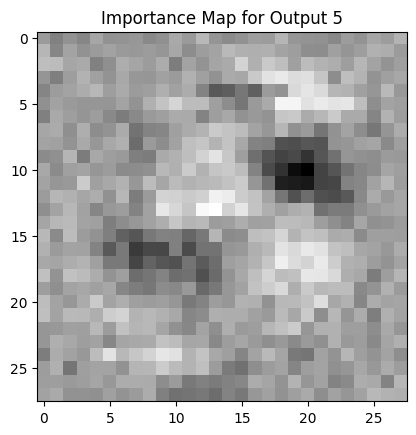

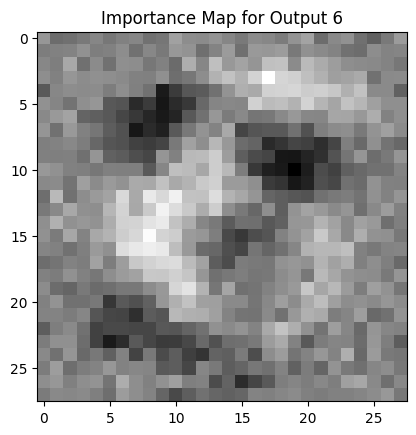

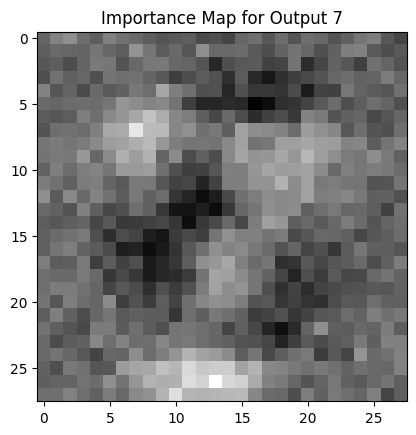

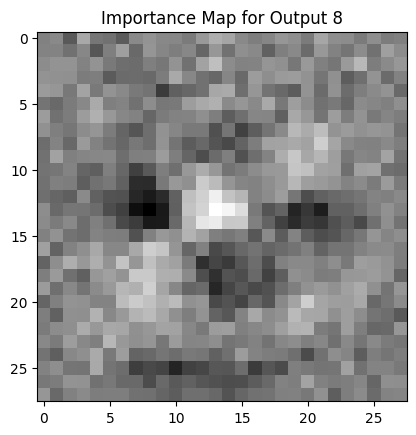

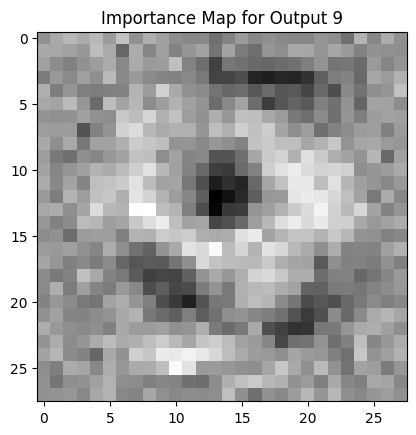

In [122]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'weights' is a list of the model's weights and biases interleaved
weights = model.get_weights()

for output_mask in range(10):
    # Extract weights for each layer
    W3 = weights[-2]   # Weights from 2nd hidden layer to output, shape (64, 10)
    W2 = weights[-4]   # Weights from 1st hidden layer to 2nd hidden layer, shape (64, 64)
    W1 = weights[-6]   # Weights from input to 1st hidden layer, shape (784, 64)

    # Extract biases for each layer
    b3 = weights[-1]   # Biases for output layer, shape (10,)
    b2 = weights[-3]   # Biases for 2nd hidden layer, shape (64,)
    b1 = weights[-5]   # Biases for 1st hidden layer, shape (64,)

    # Calculate importance for the output neuron 'output_mask'
    third_importance = W3[:, output_mask]   # Weights for the specific output neuron, shape (64,)

    # Propagate importance back through the network
    second_importance = np.dot(W2, third_importance)  # Shape (64,)
    first_importance = np.dot(W1, second_importance)  # Shape (784,)

    # Normalize the input importance
    data_max = np.max(first_importance)
    data_min = np.min(first_importance)
    input_importance = (first_importance - data_min) / (data_max - data_min)
    input_importance = input_importance * 255

    # Plot the importance map
    plt.imshow(input_importance.reshape(28, 28), cmap='gray')
    plt.title(f'Importance Map for Output {output_mask}')
    plt.show()


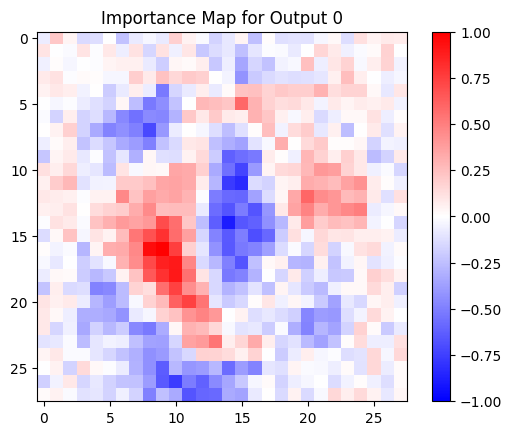

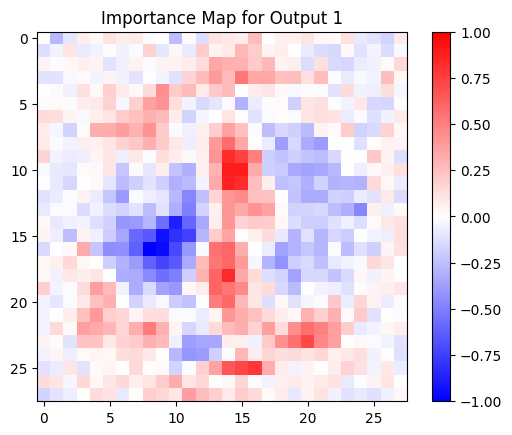

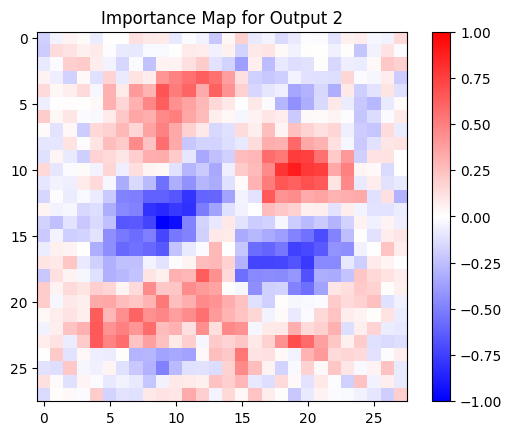

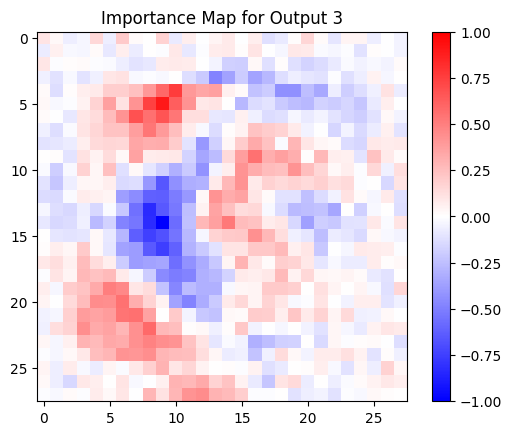

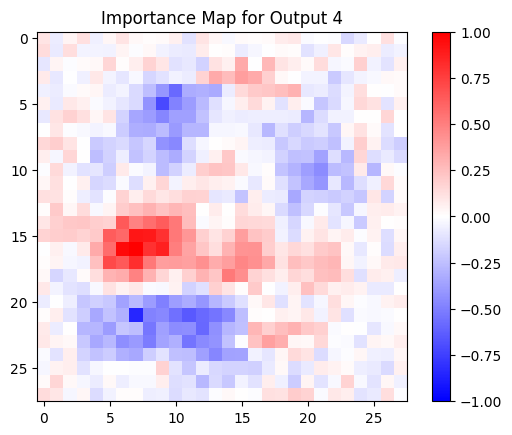

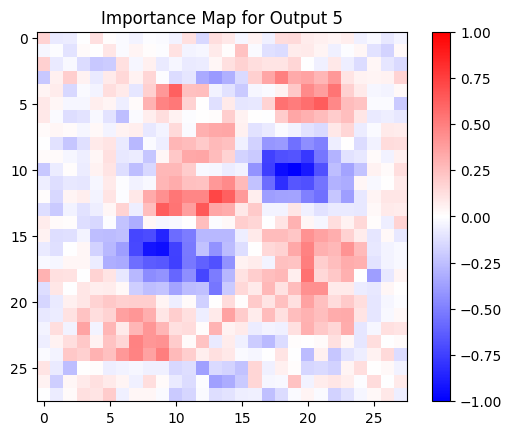

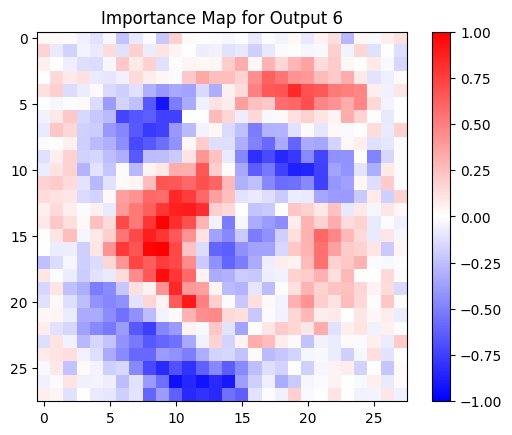

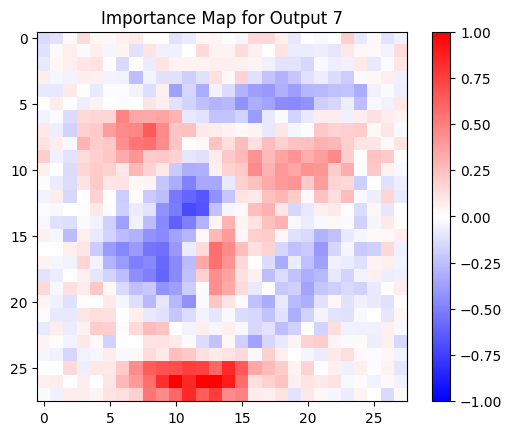

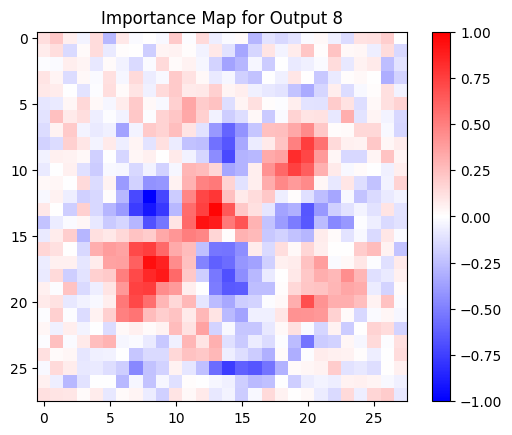

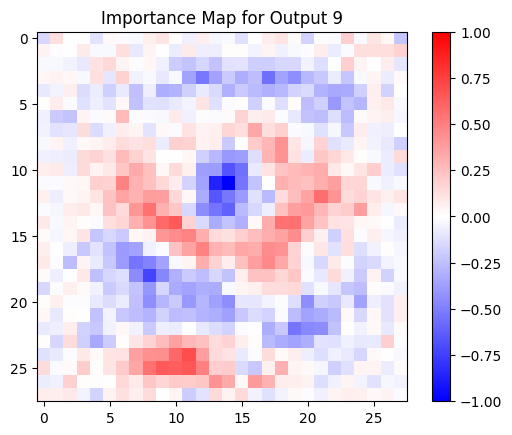

In [131]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'weights' is a list of the model's weights and biases interleaved
weights = model.get_weights()

for output_mask in range(10):
    # Extract weights for each layer
    W3 = weights[-2]   # Weights from 2nd hidden layer to output, shape (64, 10)
    W2 = weights[-4]   # Weights from 1st hidden layer to 2nd hidden layer, shape (64, 64)
    W1 = weights[-6]   # Weights from input to 1st hidden layer, shape (784, 64)

    # Extract biases for each layer
    b3 = weights[-1]   # Biases for output layer, shape (10,)
    b2 = weights[-3]   # Biases for 2nd hidden layer, shape (64,)
    b1 = weights[-5]   # Biases for 1st hidden layer, shape (64,)

    # Calculate importance for the output neuron 'output_mask'
    third_importance = W3[:, output_mask]   # Weights for the specific output neuron, shape (64,)

    # Propagate importance back through the network
    second_importance = np.dot(W2, third_importance)  # Shape (64,)
    first_importance = np.dot(W1, second_importance)  # Shape (784,)

    # Normalize the input importance between -1 and 1
    max_abs_value = np.max(np.abs(first_importance))
    input_importance = first_importance / max_abs_value

    # Plot the importance map with a diverging colormap
    plt.imshow(input_importance.reshape(28, 28), cmap='bwr', vmin=-1, vmax=1)
    plt.colorbar()
    plt.title(f'Importance Map for Output {output_mask}')
    plt.show()
